<a href="https://colab.research.google.com/github/NicolasNevaL/Phyton_Machine_Learning/blob/main/Words_2_Vec_Palabras_a_Vectores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
### Librerias necesarias Word2Vec

import gensim
from gensim.models import Word2Vec

import numpy as np
import pandas as pd
import re
import os

In [ ]:
## Read csv file
df = pd.read_csv('https://raw.githubusercontent.com/Izainea/nlp_ean/refs/heads/main/Datos/Datos%20Crudos/reviews_booking.csv')

<ipython-input-2-3e850630c6e3>:2: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('https://raw.githubusercontent.com/Izainea/nlp_ean/refs/heads/main/Datos/Datos%20Crudos/reviews_booking.csv')


## Data Exploration
Siguiendo el Notebook anterior Text_Process_Booking, utilizaremos los comandos más importantes

In [ ]:
## FIltrar Dataframe por reseña escrita
## if  df['reseña'] == 'Sí' save it in df
df = df[df['reseña'] == 'Sí']
df

Unnamed: 0            País                   Acomodación    Noches  \
0                0       Venezuela                           NaN  2 noches   
1                1        Colombia                           NaN  4 noches   
2                2        Colombia                           NaN   1 noche   
3                3        Colombia                           NaN   1 noche   
4                4        Colombia                           NaN  3 noches   
...            ...             ...                           ...       ...   
438205      438205  Estados Unidos             Apartamento Suite  4 noches   
438206      438206        Colombia                       Estudio   1 noche   
438207      438207         Ecuador                       Estudio  2 noches   
438210      438210          México   Apartamento de 1 dormitorio  4 noches   
438212      438212        Colombia  Apartamento de 2 dormitorios  2 noches   

           Fecha hospedaje             Grupo viaje              Fecha reseña  \
0            julio de 2023               En pareja       31 de julio de 2023   
1          octubre de 2024  Persona que viaja sola     23 de octubre de 2024   
2          octubre de 2024  Persona que viaja sola     15 de octubre de 2024   
3           agosto de 2024               En pareja      20 de agosto de 2024   
4            marzo de 2024               En pareja       27 de marzo de 2024   
...                    ...                     ...                       ...   
438205  septiembre de 2024              En familia  10 de septiembre de 2024   
438206     octubre de 2024  Persona que viaja sola      7 de octubre de 2024   
438207   noviembre de 2024              En familia    6 de noviembre de 2024   
438210      agosto de 2024  Persona que viaja sola   6 de septiembre de 2024   
438212     octubre de 2024  Persona que viaja sola    3 de noviembre de 2024   

                                         Titulo Calificación  \
0                                   Excepcional           10   
1                                    Fantástica           10   
2                                   Excepcional           10   
3       Gran apartamento en una gran ubicación.           10   
4                                   Excepcional           10   
...                                         ...          ...   
438205                             Como en casa           10   
438206                                      Mal          3,0   
438207                                   Pésimo          1,0   
438210                                   Pésimo          1,0   
438212                                excelente          8,0   

                                          Cosas Positivas  \
0       Fue la Mejor Opción que pudimos haber tomado e...   
1                       Ubicación, comodidades y limpieza   
2       El lugar esta muy bien ubicado, el apartamento...   
3       Todo estuvo perfecto. La ubicación y la relaci...   
4       Es muy cómodo y acogedor, la atención es excel...   
...                                                   ...   
438205                                      La amabilidad   
438206                                                NaN   
438207                                                NaN   
438210                                 No me pareció nada   
438212  muy buena ubicacion, el menaje y todo lo del a...   

                                          Cosas Negativas reseña  
0                                                     NaN     Sí  
1                                                     NaN     Sí  
2                                                     NaN     Sí  
3                                                     NaN     Sí  
4                                                     NaN     Sí  
...                                                   ...    ...  
438205                                      Todo me gustó     Sí  
438206  me cambiaron de hotel y la habitacion que soli...     Sí  
43820

In [ ]:
## Reasignación formato de calificaciones
## convert "," TO "." in df['Calificación']
df['Calificación'] = df['Calificación'].str.replace(',', '.')
df
## convert df['Calificación'] to float  dtype
df['Calificación'] = df['Calificación'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 248829 entries, 0 to 438212
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Unnamed: 0       248829 non-null  int64  
 1   País             247872 non-null  object 
 2   Acomodación      16749 non-null   object 
 3   Noches           248829 non-null  object 
 4   Fecha hospedaje  248829 non-null  object 
 5   Grupo viaje      248827 non-null  object 
 6   Fecha reseña     248829 non-null  object 
 7   Titulo           248786 non-null  object 
 8   Calificación     248829 non-null  float64
 9   Cosas Positivas  236856 non-null  object 
 10  Cosas Negativas  180013 non-null  object 
 11  reseña           248829 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 24.7+ MB


In [ ]:
# Filtrar por longitud de palabras entre 3 y 375
df_filtered1 = df[(df['Cosas Positivas'].fillna('').str.split().str.len() >= 3) & (df['Cosas Positivas'].fillna('').str.split().str.len() <= 375)]

# Tomar una muestra de 15000 comentarios del DataFrame filtrado
df_sampled1 = df_filtered1.sample(15000)
df_sampled1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15000 entries, 259214 to 326967
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       15000 non-null  int64  
 1   País             14943 non-null  object 
 2   Acomodación      1105 non-null   object 
 3   Noches           15000 non-null  object 
 4   Fecha hospedaje  15000 non-null  object 
 5   Grupo viaje      15000 non-null  object 
 6   Fecha reseña     15000 non-null  object 
 7   Titulo           14998 non-null  object 
 8   Calificación     15000 non-null  float64
 9   Cosas Positivas  15000 non-null  object 
 10  Cosas Negativas  10560 non-null  object 
 11  reseña           15000 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 1.5+ MB


In [ ]:
# Filtrar por longitud de palabras entre 1 y 403
df_filtered2 = df[(df['Cosas Negativas'].fillna('').str.split().str.len() >= 1) & (df['Cosas Negativas'].fillna('').str.split().str.len() <= 403)]

# Tomar una muestra de 15000 comentarios del DataFrame filtrado
df_sampled2 = df_filtered2.sample(15000)
df_sampled2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15000 entries, 230368 to 134175
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       15000 non-null  int64  
 1   País             14942 non-null  object 
 2   Acomodación      1001 non-null   object 
 3   Noches           15000 non-null  object 
 4   Fecha hospedaje  15000 non-null  object 
 5   Grupo viaje      14998 non-null  object 
 6   Fecha reseña     15000 non-null  object 
 7   Titulo           14996 non-null  object 
 8   Calificación     15000 non-null  float64
 9   Cosas Positivas  13999 non-null  object 
 10  Cosas Negativas  15000 non-null  object 
 11  reseña           15000 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 1.5+ MB


## Pre Procesamiento

In [ ]:
############# Preprocesamiento de texto ####################
def preprocesamiento(texto):
    texto = texto.lower()
    texto = re.sub(r"[\W\d_]+", " ", texto)
    texto = texto.split()

    return texto


In [ ]:
tlp = [preprocesamiento(texto) for texto in df_sampled1['Cosas Positivas']]

print(tlp)

[['as', 'usual', 'the', 'location', 'is', 'quiet', 'and', 'centric', 'if', 'you', 'plan', 'on', 'leaving', 'the', 'city', 'by', 'car', 'the', 'hotel', 'itselve', 'is', 'snuggly', 'fit', 'in', 'between', 'of', 'habitational', 'areas'], ['la', 'limpieza', 'el', 'aislamiento', 'del', 'ruido', 'la', 'comida', 'y', 'lo', 'cómodo', 'que', 'es', 'el', 'lugar', 'la', 'atención', 'también', 'es', 'muy', 'buena'], ['el', 'desayuno', 'es', 'delicioso', 'el', 'personal', 'super', 'amable', 'y', 'la', 'ubicación', 'exelente', 'quedé', 'súper', 'feliz', 'y', 'con', 'ganas', 'de', 'regresar', 'muy', 'pronto'], ['excellent', 'hotel', 'great', 'breakfast', 'and', 'cooks', 'restaurant', 'very', 'good', 'this', 'was', 'my', 'th', 'stay', 'and', 'will', 'return', 'again', 'for', 'business', 'or', 'pleasure'], ['vicinanza', 'e', 'comodità', 'per', 'l', 'aeroporto'], ['la', 'atención', 'del', 'personal'], ['la', 'ubicación', 'el', 'desayuno', 'y', 'la', 'atención'], ['café', 'da', 'manhã'], ['la', 'amabilid

In [ ]:
tln = [preprocesamiento(texto) for texto in df_sampled2['Cosas Negativas']]

print(tln)

[['estaban', 'en', 'arreglos', 'y', 'todo', 'estaba', 'lleno', 'de', 'polvo', 'el', 'desayuno', 'no', 'incluía', 'fruta', 'como', 'muestra', 'la', 'foto', 'ni', 'jugo', 'el', 'baño', 'no', 'tenía', 'división', 'y', 'se', 'hacía', 'mucho', 'reguero', 'de', 'agua', 'hacia', 'afuera'], ['todo', 'bien'], ['este', 'hotel', 'cumplió', 'con', 'todas', 'mis', 'expectativas'], ['ein', 'bisschen', 'laut', 'musik', 'am', 'abend', 'nicht', 'ins', 'wochenende'], ['creo', 'que', 'le', 'falta', 'internet', 'pieza', 'sin', 'tv'], ['un', 'poquito', 'de', 'ruido', 'pero', 'nada', 'fuera', 'de', 'lo', 'normal'], ['the', 'receptionist', 'not', 'friendly', 'at', 'all', 'make', 'us', 'feel', 'bad', 'because', 'we', 'book', 'it', 'through', 'booking', 'com', 'a', 'standard', 'room', 'she', 'charged', 'the', 'top', 'rate', 'for', 'an', 'additional', 'nigh', 'we', 'requested', 'the', 'rest', 'of', 'the', 'staff', 'just', 'great', 'as', 'usual', 'in', 'colombia'], ['service', 'front', 'desk', 'staff', 'were', '

## Entrenamiento de Modelo word2Vec

In [ ]:
## Concatenar tlp y tln
comentarios = tlp + tln

In [ ]:
############# Entrenamiento de modelo Word2Vec ####################

modelo = Word2Vec(comentarios, vector_size=60, window=3, min_count=1, sg=0, epochs=70, seed=42 )

### Aqui cada parametro significa lo siguiente:
# vector_size: Dimension de los vectores de palabras
# window: Numero de palabras que se toman en cuenta para predecir la siguiente palabra
# min_count: Frecuencia minima de palabras para ser considerada
# sg: 0 para CBOW y 1 para Skip-gram

In [ ]:
## Palabras similares positivas
print(modelo.wv.most_similar("atención"))

[('atencion', 0.9136218428611755), ('amabilidad', 0.8257644772529602), ('trato', 0.7316972613334656), ('actitud', 0.7281365990638733), ('ubicación', 0.6967572569847107), ('disposición', 0.6813364028930664), ('limpieza', 0.6808025240898132), ('calidez', 0.651799201965332), ('hospitalidad', 0.6393101215362549), ('amable', 0.631108820438385)]


In [ ]:
## Palabras similares negativas
print(modelo.wv.most_similar("ruido"))

[('sonido', 0.7482883930206299), ('ruidos', 0.7251116633415222), ('calor', 0.7122781276702881), ('bulla', 0.6333405375480652), ('espacio', 0.6284496188163757), ('afuera', 0.6096662878990173), ('pasillo', 0.6082271933555603), ('frio', 0.6072681546211243), ('tiempo', 0.6015153527259827), ('luz', 0.597007155418396)]


## Vizualización de Modelo Word2Vec

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import random

In [ ]:
# Obtener los vectores de palabras y sus etiquetas:
# Suponiendo que tu modelo Word2Vec se llama 'modelo'
palabras = list(modelo.wv.key_to_index)  # Obtener todas las palabras del vocabulario
# Calcular el 1% de las palabras
num_palabras_visualizar = int(len(palabras) * 0.015)

# Seleccionar palabras aleatorias
palabras_visualizar = random.sample(palabras, num_palabras_visualizar)

# Obtener los vectores de palabras correspondientes
vectores_visualizar = modelo.wv[palabras_visualizar]


In [ ]:
# Aplicar t-SNE para reducir la dimensionalidad
tsne = TSNE(n_components=2, random_state=0, perplexity=30, learning_rate=200, n_iter=1000)  # Ajusta los parámetros si es necesario
vectores_2d = tsne.fit_transform(vectores_visualizar)

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51080 (\N{HANGUL SYLLABLE ISS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50632 (\N{HANGUL SYLLABLE EOSS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51004 (\N{HANGUL SYLLABLE EU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45208 (\N{HANGUL SYLLABLE NA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/I

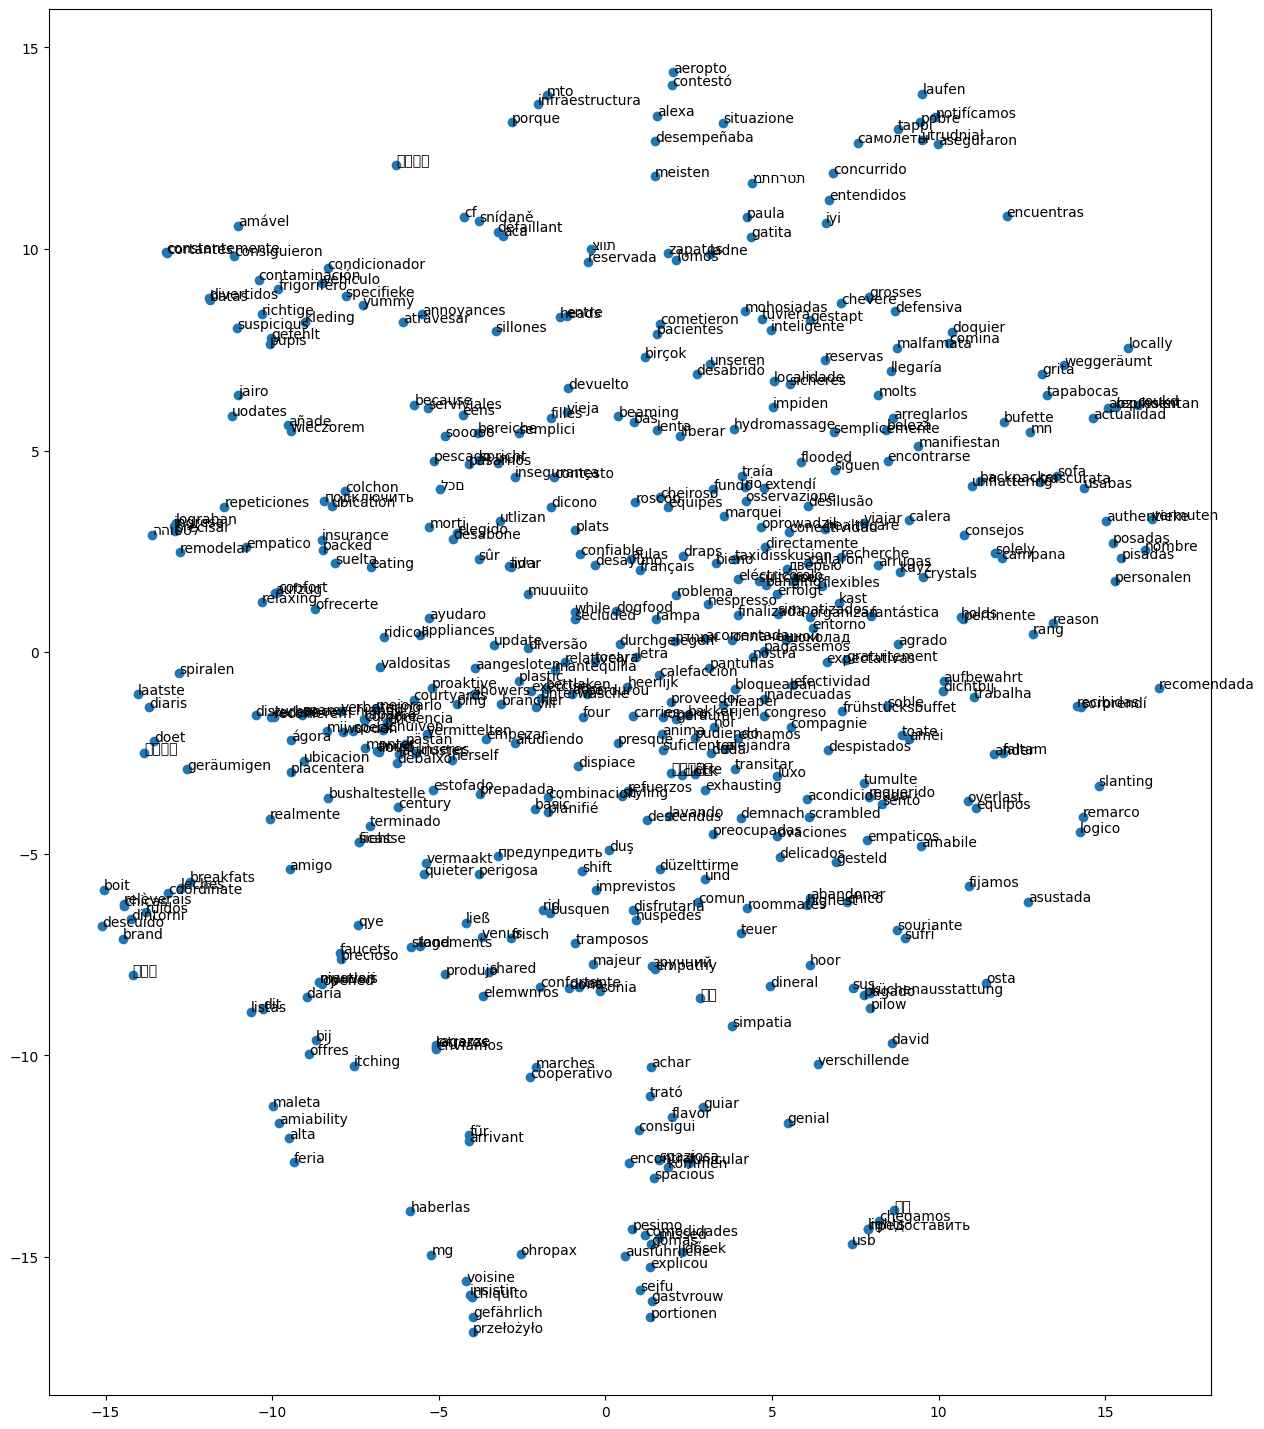

In [ ]:
# Visualizar los resultados con etiquetas
plt.figure(figsize=(15, 18))  # Ajusta el tamaño de la figura según la cantidad de palabras
plt.scatter(vectores_2d[:, 0], vectores_2d[:, 1])

# Agregar etiquetas para cada palabra
for i, palabra in enumerate(palabras_visualizar):
    plt.annotate(palabra, xy=(vectores_2d[i, 0], vectores_2d[i, 1]))

plt.show()

## Modelo de Clasificación

In [ ]:
## Promediar Vectores de Palabras
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Suponiendo que 'comentarios' es una lista de listas de palabras (documentos)
# y 'etiquetas' es una lista de etiquetas correspondientes

vectores_documentos = []
for documento in comentarios:
    vectores_palabras = [modelo.wv[palabra] for palabra in documento if palabra in modelo.wv]
    if vectores_palabras:
        vector_documento = np.mean(vectores_palabras, axis=0)
    else:
        vector_documento = np.zeros(modelo.vector_size)  # Manejar documentos vacíos
    vectores_documentos.append(vector_documento)


In [ ]:
print(vector_documento.shape)

(60,)


In [ ]:
## crear etiqeuta para asignar comentario positivos y negativos
etiquetas = []
for i in range(len(tlp)):
    etiquetas.append(1)
for i in range(len(tln)):
    etiquetas.append(0)

In [ ]:
print(etiquetas)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(vectores_documentos, etiquetas, test_size=0.2, random_state=42)

# Entrenar un clasificador (Regresión Logística en este ejemplo)
clasificador = LogisticRegression()
clasificador.fit(X_train, y_train)


LogisticRegression()

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
# Make predictions on the testing set
y_pred = clasificador.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.8545
              precision    recall  f1-score   support

           0       0.84      0.87      0.85      2952
           1       0.87      0.84      0.85      3048

    accuracy                           0.85      6000
   macro avg       0.85      0.85      0.85      6000
weighted avg       0.85      0.85      0.85      6000



In [ ]:
# Nuevo comentario a clasificar
nuevo_comentario = "Estuvo terrible, mucho ruido, no había agua caliente"

# Preprocesar el comentario
comentario_preprocesado = [preprocesamiento(texto) for texto in nuevo_comentario]
comentario_preprocesado = [palabra for sublista in comentario_preprocesado for palabra in sublista]  # Aplanar la lista

# Obtener vectores de palabras y calcular el promedio
vectores_palabras = [modelo.wv[palabra] for palabra in comentario_preprocesado if palabra in modelo.wv]
if vectores_palabras:
    vector_comentario = np.mean(vectores_palabras, axis=0)
else:
    vector_comentario = np.zeros(modelo.vector_size)  # Manejar documentos vacíos
vector_comentario = vector_comentario.reshape(1, -1)  # Ajustar la forma para la predicción

# Predecir la etiqueta
etiqueta_predicción = clasificador.predict(vector_comentario)[0]

# Imprimir la predicción
print("El comentario es clasificado como:", etiqueta_predicción)

El comentario es clasificado como: 1
